**Desarrollo de la Regresión Lineal**

**Pasos de la Actividad**

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import NotFittedError
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [70]:
# cargamos el dataset
Data = pd.read_csv("Car details v3.csv")

In [71]:
# mostramos las 8 primeras filas
Data.head(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


Identificamos los datos faltantes y atípicos en las columnas más significativas que contienen solo números

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en año')

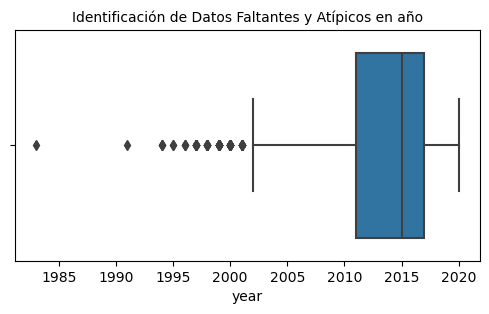

In [72]:
#Identificación de Datos Faltantes y Atípicos en año 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['year'])
plt.title('Identificación de Datos Faltantes y Atípicos en año', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en asientos')

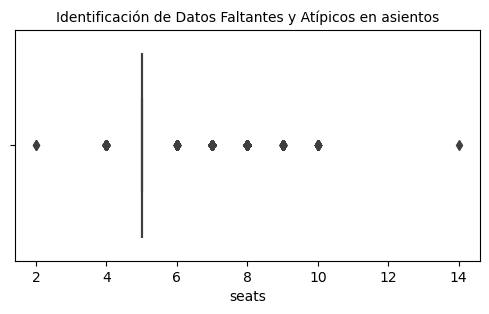

In [73]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['seats'])
plt.title('Identificación de Datos Faltantes y Atípicos en asientos', fontsize=10 )

In [74]:
#Conteo de Datos Atípicos 

nivel_minimo=2
nivel_maximo=8
Total_Atipicos=((Data['seats']<nivel_minimo)|(Data['seats']>nivel_maximo)).sum()
print("El total de datos atípicos en asientos es: {}".format(Total_Atipicos))

El total de datos atípicos en asientos es: 100


In [75]:
# Filtra Datos Atípicos

Data=Data[(Data['seats']<nivel_maximo)&(Data['seats']>nivel_minimo)]

In [76]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Data['seats']<nivel_minimo)|(Data['seats']>nivel_maximo)).sum()
print("El total de datos atípicos en asientos es: {}".format(Total_Atipicos))

El total de datos atípicos en asientos es: 0


**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [77]:
# Preprocesar los datos (se eliminaran las filas con valores faltantes y se convertiran las variables categóricas en variables numéricas)
Data.dropna(inplace=True)

labelencoder = LabelEncoder()
Data['fuel'] = labelencoder.fit_transform(Data['fuel'])
Data['seller_type'] = labelencoder.fit_transform(Data['seller_type'])
Data['transmission'] = labelencoder.fit_transform(Data['transmission'])

In [78]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7569 non-null   object 
 1   year           7569 non-null   int64  
 2   selling_price  7569 non-null   int64  
 3   km_driven      7569 non-null   int64  
 4   fuel           7569 non-null   int32  
 5   seller_type    7569 non-null   int32  
 6   transmission   7569 non-null   int32  
 7   owner          7569 non-null   object 
 8   mileage        7569 non-null   object 
 9   engine         7569 non-null   object 
 10  max_power      7569 non-null   object 
 11  torque         7569 non-null   object 
 12  seats          7569 non-null   float64
dtypes: float64(1), int32(3), int64(3), object(6)
memory usage: 739.2+ KB


In [79]:
# Total de automoviles con precio, muy significativos

Data['selling_price'].value_counts()

selling_price
300000    213
350000    193
600000    193
550000    187
450000    182
         ... 
94500       1
408000      1
654000      1
486000      1
746000      1
Name: count, Length: 652, dtype: int64

**3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

Característica de interes:
selling_price

Predecir el precio del automóvil en función de sus atributos.

In [80]:
#consultamos las 5 primeras filas en precio venta
Data[['selling_price']].head(5)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [81]:
# Dividir los datos en variables independientes (X) y dependiente (y)
X = Data.drop('selling_price', axis=1)
y = Data['selling_price']

In [82]:
print (X)

                              name  year  km_driven  fuel  seller_type  \
0           Maruti Swift Dzire VDI  2014     145500     1            1   
1     Skoda Rapid 1.5 TDI Ambition  2014     120000     1            1   
2         Honda City 2017-2020 EXi  2006     140000     3            1   
3        Hyundai i20 Sportz Diesel  2010     127000     1            1   
4           Maruti Swift VXI BSIII  2007     120000     3            1   
...                            ...   ...        ...   ...          ...   
8123             Hyundai i20 Magna  2013     110000     3            1   
8124         Hyundai Verna CRDi SX  2007     119000     1            1   
8125        Maruti Swift Dzire ZDi  2009     120000     1            1   
8126               Tata Indigo CR4  2013      25000     1            1   
8127               Tata Indigo CR4  2013      25000     1            1   

      transmission                 owner     mileage   engine   max_power  \
0                1           First

In [83]:
print (y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7569, dtype: int64


In [84]:
# Codificando las características categóricas en características numéricas usando One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [85]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=None)

**5. Entrenar el modelo configurando los diferentes hiperparámetros**

In [86]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [88]:
print (y_pred)

[979346.60085693 794645.70398668 682421.40252585 ... 674367.86291133
 104841.63820202 307059.24578351]


**6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [90]:
# No se puede usar: print(classification_report(y,y_pred))
# (y) y (y_pred) no tienen la misma longitud
print(y.shape)
print(y_pred.shape)

(7569,)
(1893,)


In [91]:
# Calculo del el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio del modelo es: {mse}')
# El error cuadrático medio (MSE) mide la diferencia entre los valores predichos y los valores reales en términos del cuadrado de la diferencia. 
# Cuanto más bajo sea el valor del MSE, mejor será el desempeño del modelo de regresión.

El error cuadrático medio del modelo es: 63217740790.743614


In [92]:
# Calculo del coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación (R²): {r2}')
# El coeficiente de determinación (R²) mide la proporción de la variabilidad de los datos que puede explicarse por el modelo de regresión.
# El coeficiente de determinación varía entre 0 y 1, donde un valor de 1 indica que el modelo explica perfectamente la variabilidad de los datos.

Coeficiente de determinación (R²): 0.9076941890083497


**7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo**

Text(0, 0.5, 'y_pred')

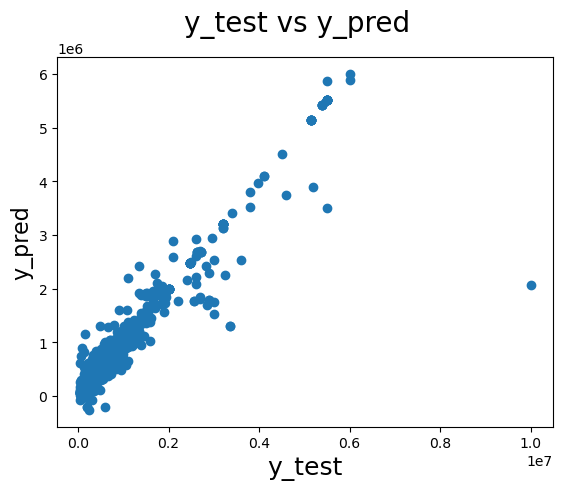

In [95]:
# Grafica que permitan visualizar los resultados del modelo
# Trazar y_test and y_pred para comprender la propagación
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

**8.Interpretar, analizar y documentar los resultados obtenidos**

Del diagrama de dispersión podemos interpretar:

El diagrama de dispersión muestra la dispersión del precio predicho de un automóvil en función del precio real del automóvil. La gráfica muestra que el precio predicho del automóvil es generalmente menor que el precio real del automóvil. Esto significa que el modelo tiende a subestimar el precio de los automóviles.

Sin embargo, hay algunos puntos de datos que se encuentran por encima de la línea diagonal si la imaginamos trazada, lo que significa que el modelo sobreestimó el precio de algunos automóviles.